# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern Mar21
### Author : Rohit Waghmare
### Task 1 : Prediction using Supervised Machine Learning.
### Problem Statement:
In this task we have to predict score of a student based on the number of hours studied.The task has two variables where the feature is the no. of hours studied and target value is the percentage score.This can be solved using simple linear regression. 

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data from the source url.
#### using pandas library

In [18]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

# to see the data from the table.
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


 ### Exploring the data

In [10]:
# to get the number of rows and columns in the data.
data.shape

(25, 2)

In [20]:
# to get the 1st 5 rows from the table
data.head()

# to get the 1st n elements from the table use: data.head(10)
# to get the 1st 10 elements from the table use: data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
# to get the overall information about the data ie mean, count, standard deviation, minimum value inside a table.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
# to get the information of dataframe ie dtypes, values(null or non-null), memory consumption etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Plotting the data
#### using matplotlib library

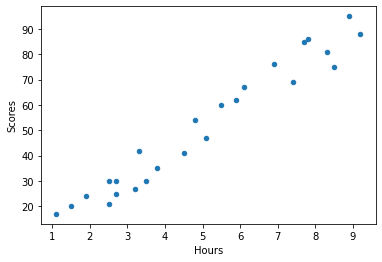

In [25]:
# Get the scatter plot and lable the x-axis as Hours and y-axis as Scores.
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

In [27]:
# to get the correaltion between the two variables.
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [28]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [29]:
hours=data['Hours']
scores=data['Scores']

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

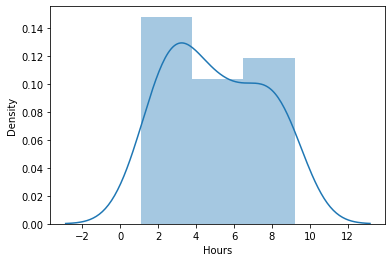

In [35]:
# distribution plot using seaborn library.
sns.distplot(hours)

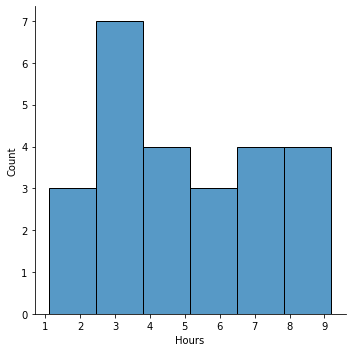

In [36]:
sns.displot(hours) # deprecated function of above.

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

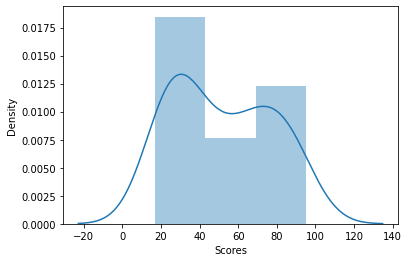

In [37]:
sns.distplot(scores)

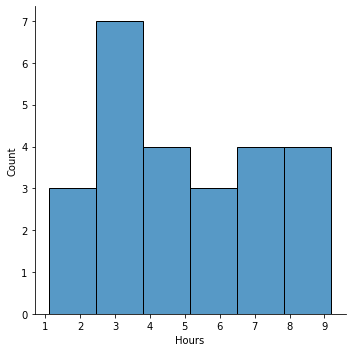

In [39]:
sns.displot(hours) # deprecated function of above.

## Linear Regression

In [42]:
# Selecting all the rows except the last one using iloc function which extracts the rows.
X=data.iloc[:, :-1].values

# selecting all the columns using iloc function.
y=data.iloc[:,1].values

In [43]:
# Dividing our data in train and test datasets using skit-learn library.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)

In [44]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

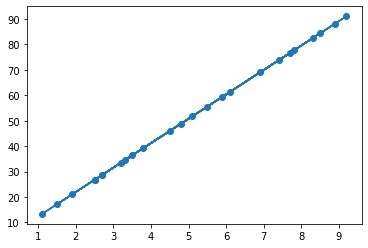

In [48]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

In [49]:
y_pred=reg.predict(X_test)

In [51]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


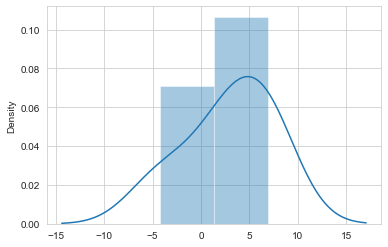

In [53]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [54]:
h=float(input('Enter the hours: '))
s=reg.predict([[h]])
print('If a student studies for {} hours per day he/she will score {}% in exam.'.format(h,s))

Enter the hours: 9.25
If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exam.
